Step.1: Importing neccessary libraries...

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Step.2: Read Datasets

In [ ]:
df=pd.read_csv("life-expectancy.csv")

In [ ]:
df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


Step.3: Sanity Check of the Data

In [ ]:
df.shape

(3306, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

In [ ]:
df.isnull().sum()

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]*100

Country Name                       0.000000
Country Code                       0.000000
Region                             0.000000
IncomeGroup                        0.000000
Year                               0.000000
Life Expectancy World Bank         5.686630
Prevelance of Undernourishment    20.689655
CO2                                4.597701
Health Expenditure %               5.444646
Education Expenditure %           32.970357
Unemployment                       9.195402
Corruption                        70.508167
Sanitation                        37.719298
Injuries                           0.000000
Communicable                       0.000000
NonCommunicable                    0.000000
dtype: float64

In [ ]:
df.duplicated().sum()

0

In [ ]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

Country Name
Afghanistan          19
Nepal                19
Malawi               19
Malaysia             19
Namibia              19
                     ..
Guinea-Bissau        19
Equatorial Guinea    19
Greece               19
Grenada              19
Zimbabwe             19
Name: count, Length: 174, dtype: int64
******************************
Country Code
AFG    19
NPL    19
MWI    19
MYS    19
NAM    19
       ..
GNB    19
GNQ    19
GRC    19
GRD    19
ZWE    19
Name: count, Length: 174, dtype: int64
******************************
Region
Europe & Central Asia         893
Sub-Saharan Africa            836
Latin America & Caribbean     551
East Asia & Pacific           513
Middle East & North Africa    304
South Asia                    152
North America                  57
Name: count, dtype: int64
******************************
IncomeGroup
High income            1083
Upper middle income     931
Lower middle income     855
Low income              437
Name: count, dtype: int64
********

Step.4: Exploratory Data Analysis (EDA)

In [ ]:
df.describe()

,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
count,3306.000000,3118.000000,2622.000000,3.154000e+03,3126.000000,2216.000000,3002.000000,975.000000,2059.000000,3.306000e+03,3.306000e+03,3.306000e+03
mean,2010.000000,69.748362,10.663654,1.574924e+05,6.364059,4.589014,7.890760,2.860513,52.738785,1.318219e+06,4.686289e+06,7.392488e+06
std,5.478054,9.408154,11.285897,7.726415e+05,2.842844,2.119165,6.270832,0.621343,30.126762,5.214068e+06,1.843727e+07,2.932688e+07
min,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,1.000000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03
25%,2005.000000,63.642000,2.500000,2.002500e+03,4.205443,3.136118,3.733000,2.500000,24.746007,6.245688e+04,5.776475e+04,3.184758e+05
50%,2010.000000,72.168500,6.200000,1.020500e+04,5.892352,4.371465,5.920000,3.000000,49.317481,2.456910e+05,3.147693e+05,1.350146e+06
75%,2015.000000,76.809000,14.775000,5.877250e+04,8.119166,5.519825,10.097500,3.250000,80.278847,8.465591e+05,2.831636e+06,3.918468e+06
max,2019.000000,84.356341,70.900000,1.070722e+07,24.230680,23.270000,37.250000,4.500000,100.000004,5.563676e+07,2.685646e+08,3.246378e+08


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3306.0,2.010000e+03,5.478054e+00,2001.000000,2005.000000,2.010000e+03,2.015000e+03,2.019000e+03
Life Expectancy World Bank,3118.0,6.974836e+01,9.408154e+00,40.369000,63.642000,7.216850e+01,7.680900e+01,8.435634e+01
Prevelance of Undernourishment,2622.0,1.066365e+01,1.128590e+01,2.500000,2.500000,6.200000e+00,1.477500e+01,7.090000e+01
CO2,3154.0,1.574924e+05,7.726415e+05,10.000000,2002.499998,1.020500e+04,5.877250e+04,1.070722e+07
Health Expenditure %,3126.0,6.364059e+00,2.842844e+00,1.263576,4.205443,5.892352e+00,8.119166e+00,2.423068e+01
Education Expenditure %,2216.0,4.589014e+00,2.119165e+00,0.850320,3.136118,4.371465e+00,5.519825e+00,2.327000e+01
Unemployment,3002.0,7.890760e+00,6.270832e+00,0.100000,3.733000,5.920000e+00,1.009750e+01,3.725000e+01
Corruption,975.0,2.860513e+00,6.213433e-01,1.000000,2.500000,3.000000e+00,3.250000e+00,4.500000e+00
Sanitation,2059.0,5.273878e+01,3.012676e+01,2.377647,24.746007,4.931748e+01,8.027885e+01,1.000000e+02
Injuries,3306.0,1.318219e+06,5.214068e+06,430.490000,62456.877500,2.456910e+05,8.465591e+05,5.563676e+07


In [ ]:
df.describe(include="object")

,Country Name,Country Code,Region,IncomeGroup
count,3306,3306,3306,3306
unique,174,174,7,4
top,Afghanistan,AFG,Europe & Central Asia,High income
freq,19,19,893,1083


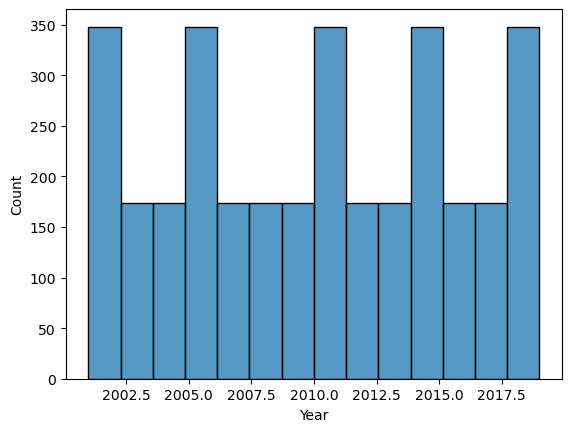

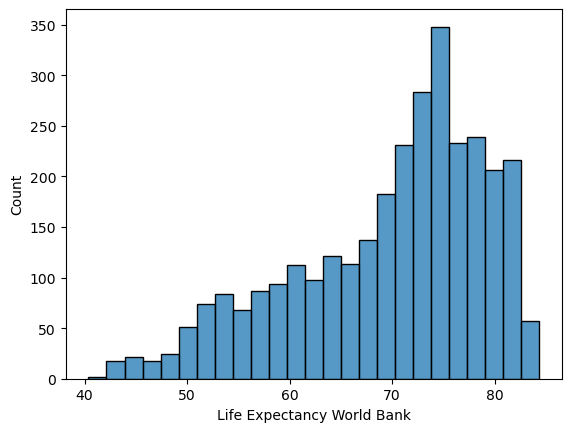

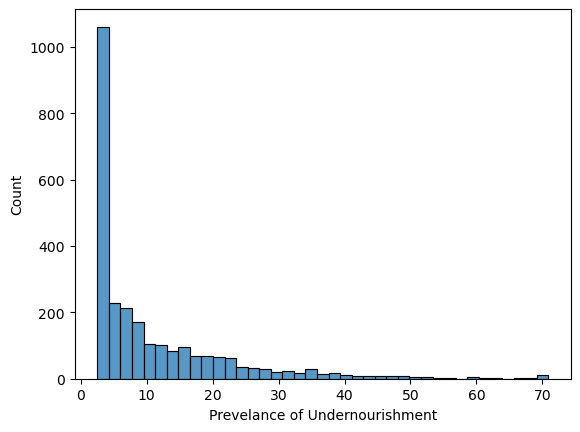

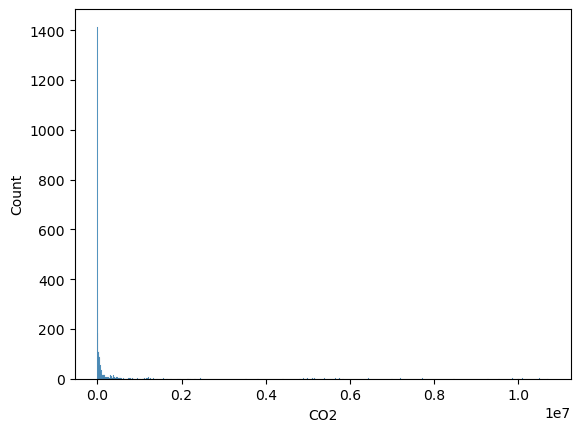

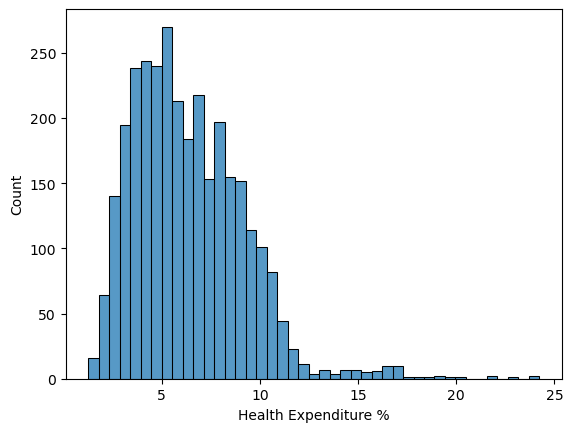

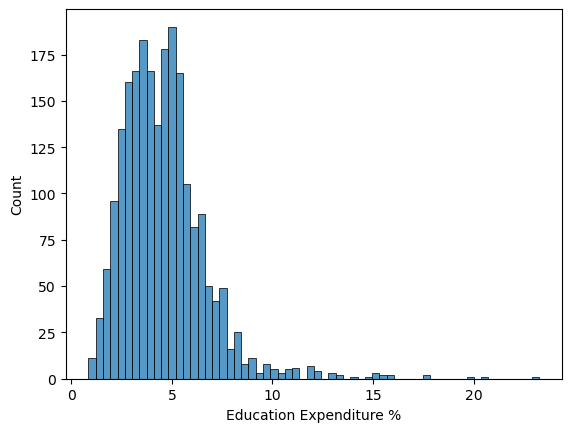

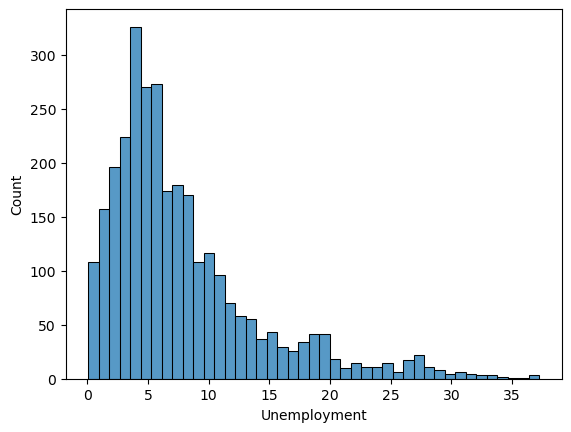

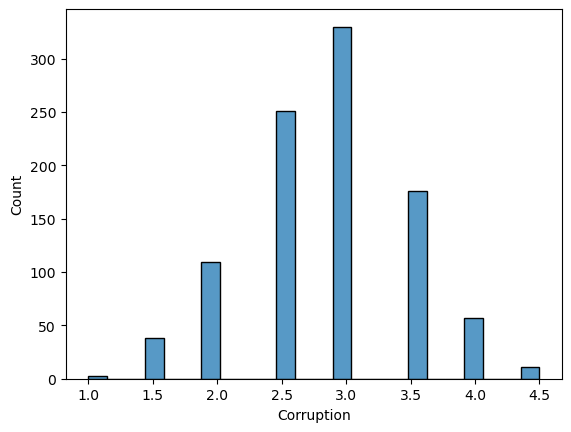

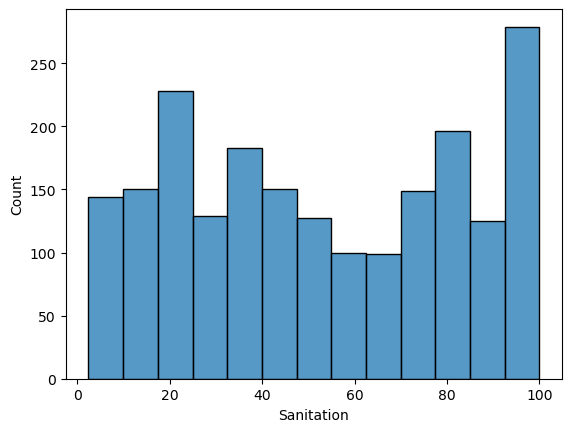

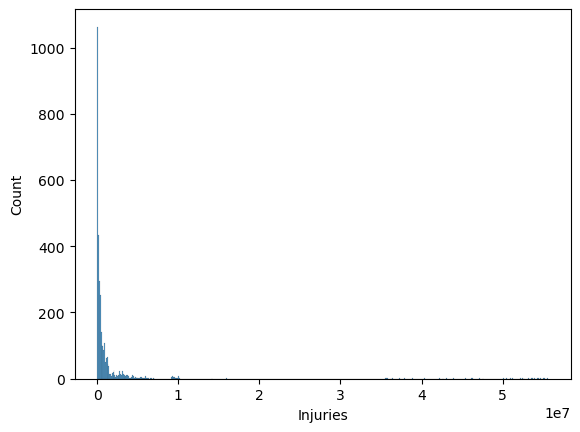

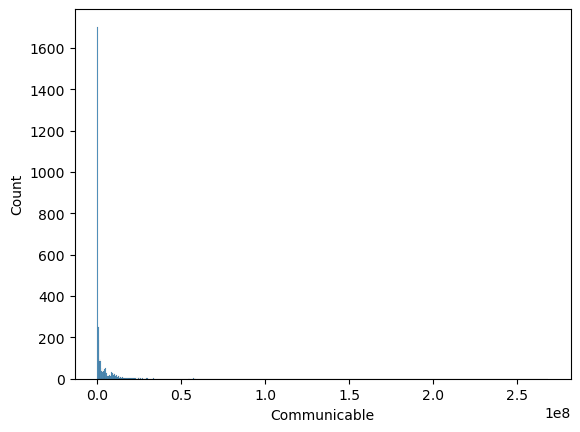

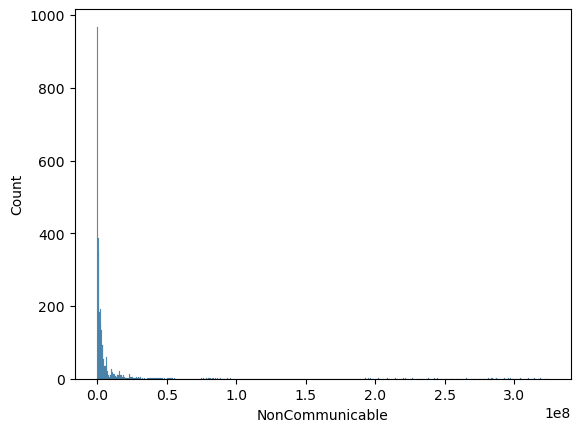

In [ ]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

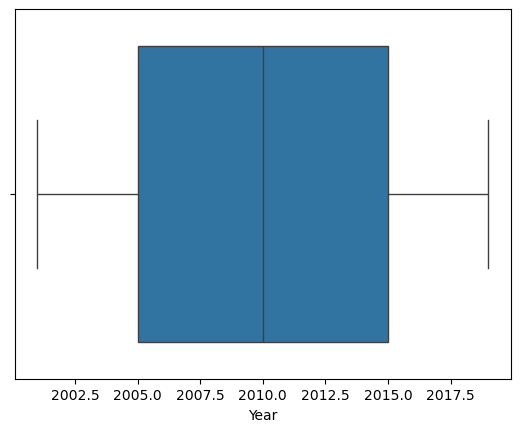

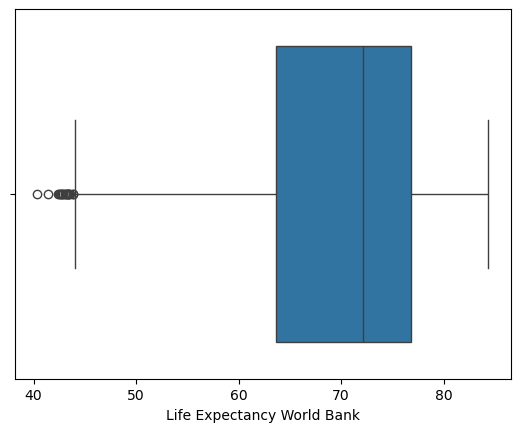

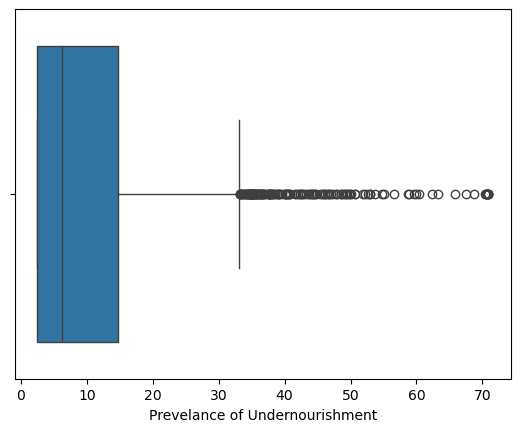

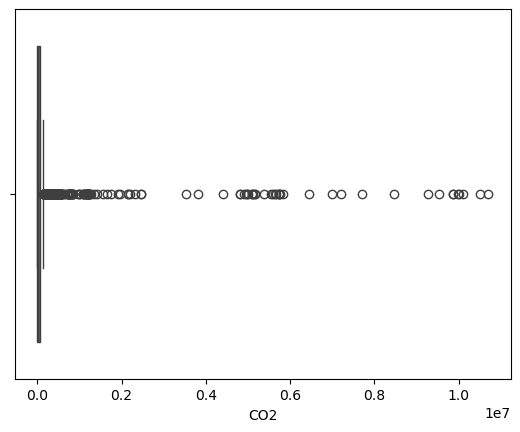

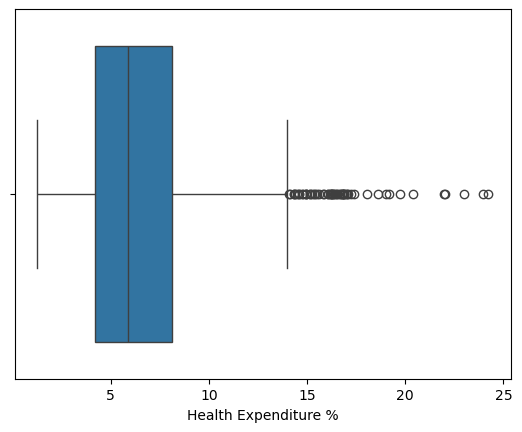

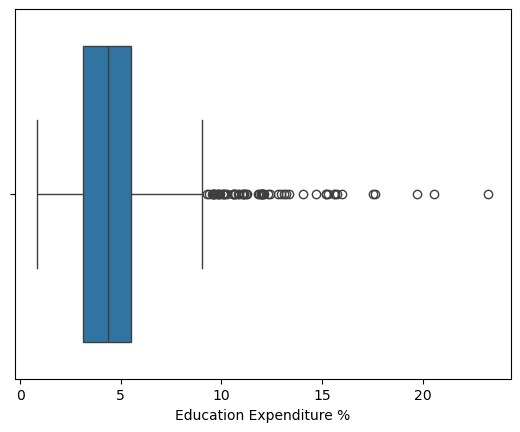

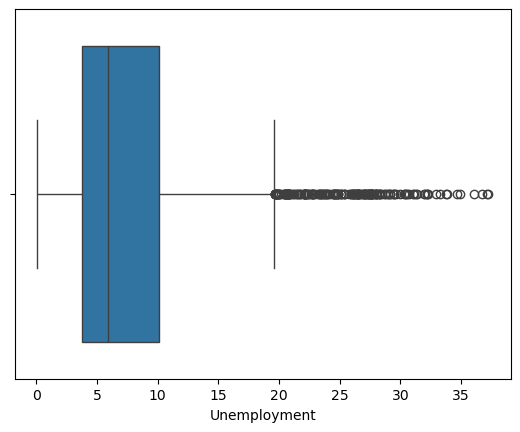

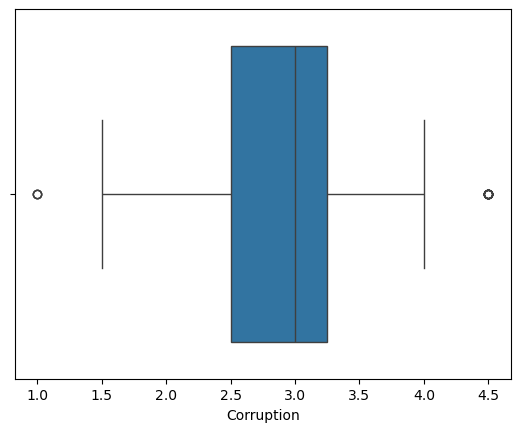

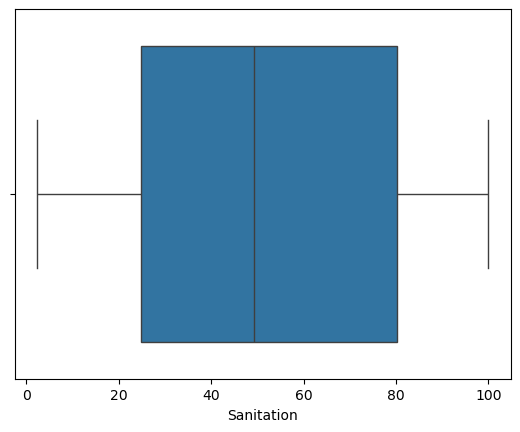

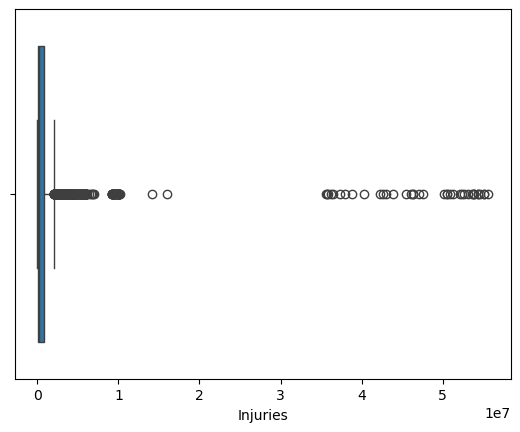

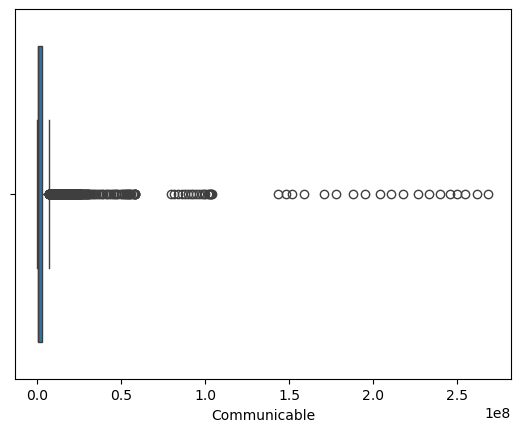

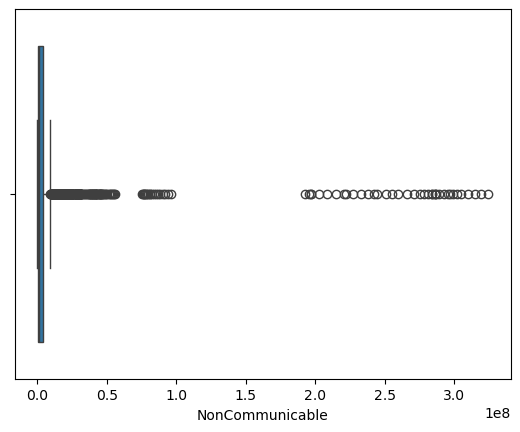

In [ ]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [ ]:
hm=df.select_dtypes(include="number").corr()

In [42]:
print(hm)

                                    Year  Life Expectancy World Bank  \
Year                            1.000000                    0.203013   
Life Expectancy World Bank      0.203013                    1.000000   
Prevelance of Undernourishment -0.144081                   -0.686749   
CO2                             0.023258                    0.130382   
Health Expenditure %            0.093686                    0.326404   
Education Expenditure %         0.029346                    0.208019   
Unemployment                   -0.050321                   -0.056668   
Corruption                     -0.013471                    0.263566   
Sanitation                      0.117233                    0.680025   
Injuries                       -0.005951                   -0.006020   
Communicable                   -0.037286                   -0.217812   
NonCommunicable                 0.018347                    0.044476   

                                Prevelance of Undernourishment 

<Axes: >

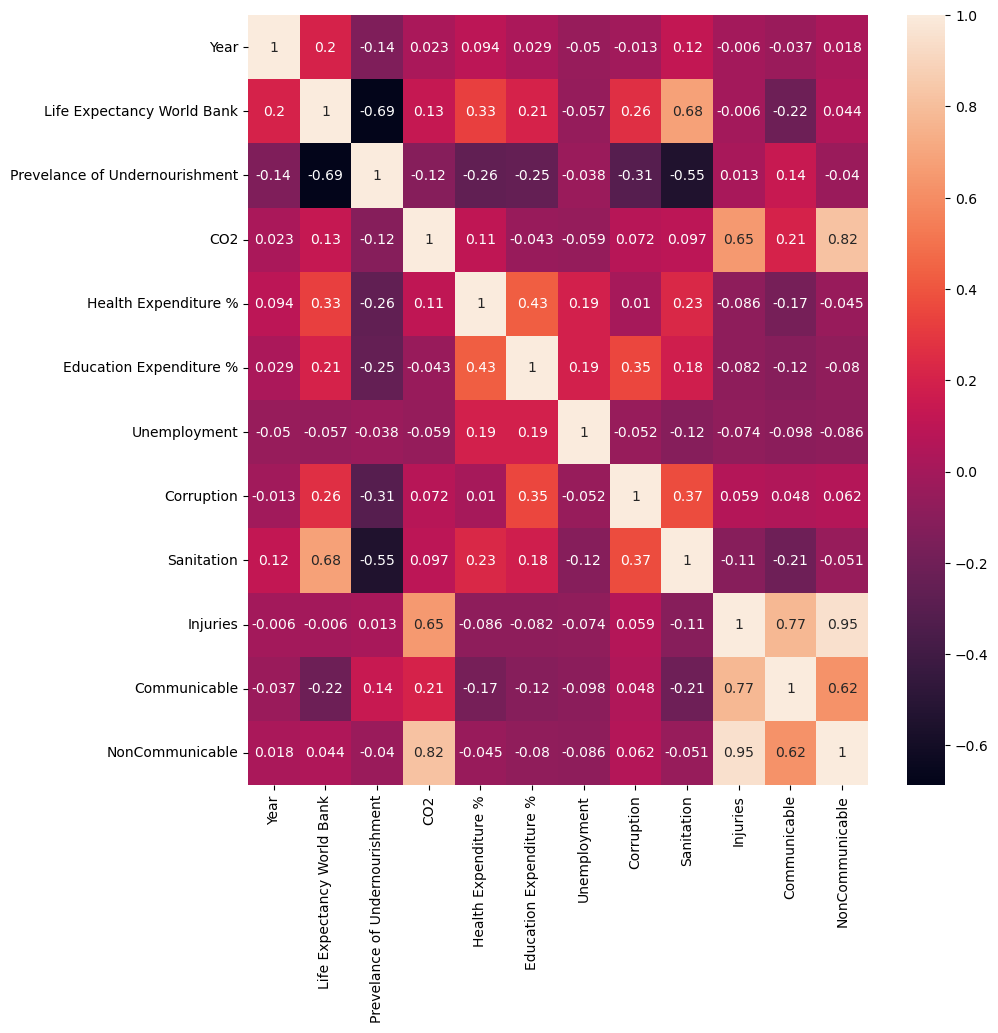

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(hm,annot=True)

Step.5: Missing Values Treatments

In [18]:
df.isnull().sum()

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

In [ ]:
df['Life Expectancy World Bank'].fillna(df['Life Expectancy World Bank'].mean(), inplace=True)

In [20]:
df.isnull().sum()

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank           0
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

In [ ]:
df['Prevelance of Undernourishment'].fillna(df['Prevelance of Undernourishment'].median(), inplace=True)

In [22]:
df.isnull().sum()

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank           0
Prevelance of Undernourishment       0
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

In [ ]:
mode_value = df['CO2'].mode()

if not mode_value.empty:
    mode_value = mode_value[0] 
    df['CO2'].fillna(mode_value, inplace=True)

In [24]:
df.isnull().sum()

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank           0
Prevelance of Undernourishment       0
CO2                                  0
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

In [25]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [26]:
for i in df.select_dtypes(include="number").columns:
    df[i]=impute.fit_transform(df[[i]])

In [27]:
df.isnull().sum()

Country Name                      0
Country Code                      0
Region                            0
IncomeGroup                       0
Year                              0
Life Expectancy World Bank        0
Prevelance of Undernourishment    0
CO2                               0
Health Expenditure %              0
Education Expenditure %           0
Unemployment                      0
Corruption                        0
Sanitation                        0
Injuries                          0
Communicable                      0
NonCommunicable                   0
dtype: int64